# Credits and Information

In [94]:
#Data Set Credit to Investoring.com S and P 500 Historical Dataset:
#https://www.investing.com/indices/us-spx-500-historical-data

In [95]:
#Code Code and Analysis Completed by Adam Staley with assistance from ChatGPT4 for certain implementations

In [96]:
#import statements 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


# Building the datset

In [97]:
#build the dataset
first = pd.read_csv('S&P 500 Historical Data.csv')
second = pd.read_csv('S&P 500 Historical Data (1).csv')
third = pd.read_csv('S&P 500 Historical Data (2).csv')

In [98]:
combined = pd.concat([first, second], ignore_index=True)
combined = pd.concat([combined, third], ignore_index = True)

In [99]:
combined
#combined dataset from multiple downloads

,Date,Price,Open,High,Low,Vol.,Change %
0,09/30/1999,"1,282.70","1,268.40","1,291.30","1,268.40",NaN,1.13%
1,09/29/1999,"1,268.40","1,282.20","1,288.80","1,268.20",NaN,-1.08%
2,09/28/1999,"1,282.20","1,283.30","1,285.50","1,256.30",NaN,-0.09%
3,09/27/1999,"1,283.30","1,277.40","1,295.00","1,277.40",NaN,0.46%
4,09/24/1999,"1,277.40","1,280.40","1,281.20","1,263.80",NaN,-0.23%
...,...,...,...,...,...,...,...
11089,08/22/2019,"2,922.95","2,930.94","2,939.08","2,904.51",NaN,-0.05%
11090,08/21/2019,"2,924.43","2,922.04","2,928.73","2,917.91",NaN,0.82%
11091,08/20/2019,"2,900.51","2,919.01","2,923.63","2,899.60",NaN,-0.79%
11092,08/19/2019,"2,923.65","2,913.48","2,931.00","2,913.48",NaN,1.21%


In [100]:
combined['Date'] = pd.to_datetime(combined['Date'], format='%m/%d/%Y')
combined = combined.sort_values(by = 'Date', ascending = True).reset_index().drop('index', axis = 1)
combined

,Date,Price,Open,High,Low,Vol.,Change %
0,1979-12-26,107.80,107.80,108.40,107.10,NaN,0.09%
1,1979-12-27,108.00,108.00,108.50,107.10,NaN,0.19%
2,1979-12-28,107.80,107.80,108.60,107.20,NaN,-0.19%
3,1979-12-31,107.90,107.90,108.50,107.30,NaN,0.09%
4,1980-01-01,107.90,107.90,107.90,107.90,NaN,0.00%
...,...,...,...,...,...,...,...
11089,2023-12-14,"4,719.55","4,721.04","4,738.57","4,694.34",NaN,0.26%
11090,2023-12-15,"4,719.19","4,714.23","4,725.53","4,704.69",NaN,-0.01%
11091,2023-12-18,"4,740.56","4,725.58","4,749.52","4,725.58",NaN,0.45%
11092,2023-12-19,"4,768.37","4,743.72","4,768.69","4,743.72",NaN,0.59%


In [101]:
def fix_datset(df):

    if not pd.api.types.is_float_dtype(df['Price']):
        df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''), errors='coerce')
    if not pd.api.types.is_numeric_dtype(df['Change %']):
        df['Change %'] = df['Change %'].str.rstrip('%').astype('float')
    else:
        df['Change %'] = df['Change %'] / 100  # Assuming the value is a percentage

    #FIX CHANGE
    if not pd.api.types.is_numeric_dtype(df['Change %']):
        df['Change %'] = df['Change %'].str.rstrip('%').astype('float')
    else:
        df['Change %'] = df['Change %'] / 100  # Assuming the value is a percentage
        
    return df

In [102]:
combined = fix_datset(combined)

In [103]:
combined

,Date,Price,Open,High,Low,Vol.,Change %
0,1979-12-26,107.80,107.80,108.40,107.10,NaN,0.0009
1,1979-12-27,108.00,108.00,108.50,107.10,NaN,0.0019
2,1979-12-28,107.80,107.80,108.60,107.20,NaN,-0.0019
3,1979-12-31,107.90,107.90,108.50,107.30,NaN,0.0009
4,1980-01-01,107.90,107.90,107.90,107.90,NaN,0.0000
...,...,...,...,...,...,...,...
11089,2023-12-14,4719.55,"4,721.04","4,738.57","4,694.34",NaN,0.0026
11090,2023-12-15,4719.19,"4,714.23","4,725.53","4,704.69",NaN,-0.0001
11091,2023-12-18,4740.56,"4,725.58","4,749.52","4,725.58",NaN,0.0045
11092,2023-12-19,4768.37,"4,743.72","4,768.69","4,743.72",NaN,0.0059


# Functions

In [104]:
def generalized_leverage_adder(df, dailyLeverageFactor):
     # Ensure 'Date' is a datetime
    df['Date'] = pd.to_datetime(df['Date'])
        
    new_price_col_name = str(dailyLeverageFactor) + 'x' ' Leveraged Price'
    new_change_col_name = str(dailyLeverageFactor) + 'x' ' Leveraged Change'
    

    # Create a new column for leveraged change
    df[new_change_col_name] = df['Change %'] * dailyLeverageFactor

    # Initialize a new column for leveraged price
    df[new_price_col_name] = df['Price'].iloc[0]

    # Apply the leveraged changes to the price
    for i in range(1, len(df)):
        df.loc[i,  new_price_col_name] = df.loc[i - 1, new_price_col_name] * (1 + df.loc[i, new_change_col_name])

    return df

In [105]:
def calculate_sortino_ratio(df, column_name, risk_free_rate=0.02):
    """
    Calculate the Sortino Ratio for a given price column in a DataFrame.

    :param df: Pandas DataFrame with price data.
    :param column_name: String name of the column with price data.
    :param risk_free_rate: Annual risk-free rate, default is 2% (0.02).
    :return: Sortino Ratio.
    """
    # Calculate daily returns
    df['daily_return'] = df[column_name].pct_change()

    # Calculate the mean of daily returns
    mean_return = df['daily_return'].mean()

    # Calculate the downside deviation (standard deviation of negative returns)
    negative_returns = df[df['daily_return'] < 0]['daily_return']
    downside_deviation = np.sqrt(np.mean(negative_returns ** 2))

    # Annualize the mean return and risk-free rate
    annualized_return = (1 + mean_return) ** 252 - 1
    annualized_risk_free_rate = (1 + risk_free_rate) ** (1/252) - 1

    # Calculate the Sortino Ratio
    sortino_ratio = (annualized_return - annualized_risk_free_rate) / downside_deviation

    return sortino_ratio

In [106]:
def generalized_rolling_returns(df, price_column, num_years):


    # Calculate the rolling return
    # The number of trading days in a year is approximately 252, so 5 years would be 252 * 5
    rolling_window = 252 * 5
    df[str(num_years) + ' yr Rolling Return ' + price_column] = df[price_column].pct_change(periods=rolling_window) * 100

    return df


In [107]:
def annual_std_dev_percentage(df, date_column, price_column):
    # Ensure 'Date' is a datetime
    df[date_column] = pd.to_datetime(df[date_column])
    df = df.sort_values(by=date_column)

    # Calculate daily returns as percentage change
    df['daily_return'] = df[price_column].pct_change()

    # Group by year and calculate standard deviation of daily returns
    annual_std_percentage = df.groupby(df[date_column].dt.year)['daily_return'].std()

    # Convert to percentage
    annual_std_percentage *= 100

    return annual_std_percentage

In [108]:
def calculate_beta(df, stock_return_column, market_return_column):
    """
    Calculate the beta of a stock based on daily returns.

    :param df: Pandas DataFrame containing the stock and market returns.
    :param stock_return_column: String name of the column with the stock's daily returns.
    :param market_return_column: String name of the column with the market's daily returns.
    :return: Beta value of the stock.
    """
    # Ensure the data is float
    df[stock_return_column] = pd.to_numeric(df[stock_return_column], errors='coerce')
    df[market_return_column] = pd.to_numeric(df[market_return_column], errors='coerce')

    # Drop any NaN values
    df = df.dropna(subset=[stock_return_column, market_return_column])

    # Calculate covariance and variance
    covariance = df[stock_return_column].cov(df[market_return_column])
    variance = df[market_return_column].var()

    # Calculate beta
    beta = covariance / variance

    return beta

In [109]:
def simulate_investment(df, money_amount, start_month, end_month, other_column_x):
    # Ensure 'Date' is a datetime
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by='Date')
    other_column = str(other_column_x) + 'x' + ' Leveraged Price'

    # Calculate daily returns for regular and leveraged funds
    df['regular_daily_return'] = df['Price'].pct_change()
    df['leveraged_daily_return'] = df[other_column].pct_change()

    # Initialize investment value
    df['investment_value'] = money_amount

    # Determine if we are always in the regular period
    always_regular = start_month == 0 and end_month == 0

    # Loop through each row in the DataFrame
    for i in range(1, len(df)):
        if always_regular:
            df.loc[i, 'investment_value'] = df.loc[i - 1, 'investment_value'] * (1 + df.loc[i, 'regular_daily_return'])
        else:
            current_month = df.loc[i, 'Date'].month

            # Determine if we are in the leveraged period
            if start_month <= end_month:
                in_leveraged_period = start_month <= current_month <= end_month
            else:  # For cases where the period spans the end of the year
                in_leveraged_period = current_month >= start_month or current_month <= end_month

            # Apply the appropriate daily return
            if in_leveraged_period:
                df.loc[i, 'investment_value'] = df.loc[i - 1, 'investment_value'] * (1 + df.loc[i, 'leveraged_daily_return'])
            else:
                df.loc[i, 'investment_value'] = df.loc[i - 1, 'investment_value'] * (1 + df.loc[i, 'regular_daily_return'])

    return df[['Date', 'investment_value']]

In [110]:
def replicate_first_value(df, column_name, frequency):
    # Ensure the 'Date' column is in datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Determine the frequency and create a corresponding period column
    if frequency.lower() == 'month':
        period_column = 'Month'
        df[period_column] = df['Date'].dt.to_period('M')
    elif frequency.lower() == 'year':
        period_column = 'Year'
        df[period_column] = df['Date'].dt.to_period('Y')
    else:
        raise ValueError("Frequency must be either 'month' or 'year'")

    # Group by the period column and transform using the first value of each group
    first_values = df.groupby(period_column)[column_name].transform('first')

    # Assign the first values to a new column
    df[f'First_{frequency.capitalize()}_{column_name}'] = first_values

    # Drop the period column if you don't need it anymore
    df.drop(period_column, axis=1, inplace=True)

    return df

In [111]:
def generalized_non_daily_rebalance(df, price_column_name, frequency, leverage_factor, start_price):
    # Ensure the 'Date' column is in datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Determine the frequency and create a corresponding period column
    if frequency.lower() == 'month':
        period_column = 'Month'
        df[period_column] = df['Date'].dt.to_period('M')
    elif frequency.lower() == 'year':
        period_column = 'Year'
        df[period_column] = df['Date'].dt.to_period('Y')
    else:
        raise ValueError("Frequency must be either 'month' or 'year'")

    # Group by the period column and transform using the first value of each group
    first_values = df.groupby(period_column)[price_column_name].transform('first')
    prior_price = start_price
    calculated_price = np.array([start_price])
    
    for i in range(1, len(df)):
        new_factor = ((prior_price + (first_values.iloc[i] * (leverage_factor - 1))) / prior_price)
        #print(new_factor)
        value_2 = (new_factor * df['Change %'].iloc[i]) + 1
        #print(value_2)
        point = value_2 * prior_price
        #print(point)
        calculated_price = np.append(calculated_price, point)
        prior_price = point
        
        #new_value = ((prior_price + first_values.iloc[i]) / prior_price) * ((leverage_factor * df['Change %'].iloc[i]) + 1)
        #print(new_value)
        #price_diff = df.loc[i,price_column_name] - df.loc[i-1, price_column_name]
        #print(new_value)
        #point = prior_price + new_value * price_diff
        #print(point)
        #calculated_price = np.append(calculated_price, point)
        #prior_price = point
    
    df[ str({leverage_factor}) + 'x ' + str({frequency}) + 'indicated rebalance'] = calculated_price
    return df


In [112]:
import pandas as pd
from datetime import datetime

def calculate_cagr(df, initial_col='2x Leveraged Price', final_col='2x Leveraged Price'):
    """
    Calculate the Compound Annual Growth Rate (CAGR) for an investment.

    Parameters:
    - df: DataFrame containing the investment data.
    - initial_col: Column name for the initial value of the investment.
    - final_col: Column name for the final value of the investment.

    Returns:
    - CAGR as a float.
    """
    # Convert the 'Date' column to datetime format if it's not already
    if not pd.api.types.is_datetime64_any_dtype(df['Date']):
        df['Date'] = pd.to_datetime(df['Date'])

    # Calculate the total number of days for the investment period
    days = (df['Date'].iloc[-1] - df['Date'].iloc[0]).days

    # Convert days to years
    years = days / 365.25

    # Get the initial and final values of the investment
    initial_value = df[initial_col].iloc[0]
    final_value = df[final_col].iloc[-1]

    # Calculate CAGR
    cagr = (final_value / initial_value) ** (1 / years) - 1

    return cagr


In [113]:
#risk analysis:

In [114]:
def annualized_volatility(df, price_column):
    # Ensure 'Date' is a datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Calculate daily returns
    df['Daily_Return'] = df[price_column].pct_change().fillna(0)

    # Extract the year from the 'Date' column
    df['Year'] = df['Date'].dt.year

    # Group by year and calculate the standard deviation of daily returns
    daily_std_per_year = df.groupby('Year')['Daily_Return'].std()

    # Annualize the standard deviation
    annualized_volatility = daily_std_per_year * np.sqrt(252) *100

    return annualized_volatility

In [115]:
def calculate_yearly_return(df, price_column):
    # Ensure 'Date' is a datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract the year from the 'Date' column
    df['Year'] = df['Date'].dt.year

    # Group by year and calculate the first and last price
    yearly_first = df.groupby('Year')[price_column].first()
    yearly_last = df.groupby('Year')[price_column].last()

    # Calculate the yearly return
    yearly_return = (yearly_last - yearly_first) / yearly_first

    return yearly_return * 100

In [116]:
#Discarded functions here, kept for reference:
'''def interval_rebalance_calibrator(df, price_column, base_price_column, leverage_factor):
    # Ensure 'Date' is a datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Fix 'Price' if necessary
    if not pd.api.types.is_float_dtype(df[price_column]):
        df[price_column] = pd.to_numeric(df[price_column].str.replace(',', ''), errors='coerce')

    # Extract year and month from the 'Date' column
    df['YearMonth'] = df['Date'].dt.to_period('M')

    # Get the first value of each month for the base price
    df[base_price_column] = df.groupby('YearMonth')[base_price_column].transform('first')

    # Initialize a new column for indicated rebalance
    df['indicated rebalance'] = df[price_column].iloc[0]

    # Apply the rebalancing calculation
    for i in range(1, len(df)):
        df.loc[i, 'indicated rebalance'] = (df.loc[i, price_column] * leverage_factor) - ((leverage_factor - 1) * df.loc[i, base_price_column])

    # Drop the 'YearMonth' column if you don't need it anymore
    df.drop('YearMonth', axis=1, inplace=True)

    return df'''
'''def interval_rebalance_calibrator(df, price_column, base_price_column, leverage_factor):
    # Ensure 'Date' is a datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Fix 'Price' if necessary
    if not pd.api.types.is_float_dtype(df[price_column]):
        df[price_column] = pd.to_numeric(df[price_column].str.replace(',', ''), errors='coerce')

    # Extract year and month from the 'Date' column
    df['YearMonth'] = df['Date'].dt.to_period('M')

    # Get the first value of each month for the base price
    df[base_price_column] = df.groupby('YearMonth')[base_price_column].transform('first')

    # Apply the rebalancing calculation
    
    for i in range(1, len(df)):
        price_diff = df.loc[i, price_column] - df.loc[i-1, price_column]
        df.loc[i, 'indicated rebalance'] = 

    # Drop the 'YearMonth' column if you don't need it anymore
    df.drop('YearMonth', axis=1, inplace=True)

    return df'''

"def interval_rebalance_calibrator(df, price_column, base_price_column, leverage_factor):\n    # Ensure 'Date' is a datetime\n    df['Date'] = pd.to_datetime(df['Date'])\n\n    # Fix 'Price' if necessary\n    if not pd.api.types.is_float_dtype(df[price_column]):\n        df[price_column] = pd.to_numeric(df[price_column].str.replace(',', ''), errors='coerce')\n\n    # Extract year and month from the 'Date' column\n    df['YearMonth'] = df['Date'].dt.to_period('M')\n\n    # Get the first value of each month for the base price\n    df[base_price_column] = df.groupby('YearMonth')[base_price_column].transform('first')\n\n    # Apply the rebalancing calculation\n    \n    for i in range(1, len(df)):\n        price_diff = df.loc[i, price_column] - df.loc[i-1, price_column]\n        df.loc[i, 'indicated rebalance'] = \n\n    # Drop the 'YearMonth' column if you don't need it anymore\n    df.drop('YearMonth', axis=1, inplace=True)\n\n    return df"

In [117]:
# out of commison for now
'''def monthly_rebalanced_leverage(df, price_column, leverage_factor):
    # Ensure 'Date' is a datetime
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by='Date')

    # Calculate daily returns
    df['daily_return'] = df[price_column].pct_change()

    # Initialize the investment value column
    df['leveraged_value'] = 107.8  # Start with a normalized value of 1

    # Get the first day of each month
    first_days = df['Date'].dt.to_period('M').drop_duplicates().dt.to_timestamp()

    # Loop through each month
    for i in range(len(first_days)):
        # Determine the start and end of the month
        start_date = first_days.iloc[i]
        end_date = first_days.iloc[i + 1] if i + 1 < len(first_days) else df['Date'].iloc[-1] + pd.Timedelta(days=1)

        # Apply leverage to daily returns for the entire month
        df.loc[(df['Date'] >= start_date) & (df['Date'] < end_date), 'leveraged_value'] *= (1 + df['daily_return'] * leverage_factor).cumprod()

    return df'''


"def monthly_rebalanced_leverage(df, price_column, leverage_factor):\n    # Ensure 'Date' is a datetime\n    df['Date'] = pd.to_datetime(df['Date'])\n    df = df.sort_values(by='Date')\n\n    # Calculate daily returns\n    df['daily_return'] = df[price_column].pct_change()\n\n    # Initialize the investment value column\n    df['leveraged_value'] = 107.8  # Start with a normalized value of 1\n\n    # Get the first day of each month\n    first_days = df['Date'].dt.to_period('M').drop_duplicates().dt.to_timestamp()\n\n    # Loop through each month\n    for i in range(len(first_days)):\n        # Determine the start and end of the month\n        start_date = first_days.iloc[i]\n        end_date = first_days.iloc[i + 1] if i + 1 < len(first_days) else df['Date'].iloc[-1] + pd.Timedelta(days=1)\n\n        # Apply leverage to daily returns for the entire month\n        df.loc[(df['Date'] >= start_date) & (df['Date'] < end_date), 'leveraged_value'] *= (1 + df['daily_return'] * leverage_factor

In [118]:
#risk analysis Reference:

In [119]:
'''def annual_price_std_as_percentage(df, price_column):
    # Ensure 'Date' is a datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract the year from the 'Date' column
    df['Year'] = df['Date'].dt.year

    # Group by year and calculate standard deviation and mean
    annual_stats = df.groupby('Year')[price_column].agg(['std', 'mean'])

    # Calculate standard deviation as a percentage of the mean
    annual_stats['std_percentage'] = (annual_stats['std'] / annual_stats['mean']) * 100

    return annual_stats['std_percentage']'''

"def annual_price_std_as_percentage(df, price_column):\n    # Ensure 'Date' is a datetime\n    df['Date'] = pd.to_datetime(df['Date'])\n\n    # Extract the year from the 'Date' column\n    df['Year'] = df['Date'].dt.year\n\n    # Group by year and calculate standard deviation and mean\n    annual_stats = df.groupby('Year')[price_column].agg(['std', 'mean'])\n\n    # Calculate standard deviation as a percentage of the mean\n    annual_stats['std_percentage'] = (annual_stats['std'] / annual_stats['mean']) * 100\n\n    return annual_stats['std_percentage']"

In [120]:
'''def annualized_monthly_std_as_percentage(df, price_column):
    # Ensure 'Date' is a datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract year and month from the 'Date' column
    df['YearMonth'] = df['Date'].dt.to_period('M')

    # Group by year and month, then calculate the standard deviation
    monthly_std = df.groupby('YearMonth')[price_column].std()

    # Group by year and calculate the mean of monthly standard deviations
    annual_mean_of_monthly_std = monthly_std.groupby(monthly_std.index.year).mean()

    # Group by year and calculate the mean price
    annual_mean_price = df.groupby(df['Date'].dt.year)[price_column].mean()

    # Annualize the monthly standard deviation and convert to percentage
    annualized_std_percentage = (annual_mean_of_monthly_std * np.sqrt(12)) / annual_mean_price * 100

    return annualized_std_percentage
'''

"def annualized_monthly_std_as_percentage(df, price_column):\n    # Ensure 'Date' is a datetime\n    df['Date'] = pd.to_datetime(df['Date'])\n\n    # Extract year and month from the 'Date' column\n    df['YearMonth'] = df['Date'].dt.to_period('M')\n\n    # Group by year and month, then calculate the standard deviation\n    monthly_std = df.groupby('YearMonth')[price_column].std()\n\n    # Group by year and calculate the mean of monthly standard deviations\n    annual_mean_of_monthly_std = monthly_std.groupby(monthly_std.index.year).mean()\n\n    # Group by year and calculate the mean price\n    annual_mean_price = df.groupby(df['Date'].dt.year)[price_column].mean()\n\n    # Annualize the monthly standard deviation and convert to percentage\n    annualized_std_percentage = (annual_mean_of_monthly_std * np.sqrt(12)) / annual_mean_price * 100\n\n    return annualized_std_percentage\n"

In [121]:
'''def annualized_std_of_monthly_returns(df, price_column):
    # Ensure 'Date' is a datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Calculate monthly returns
    df['Monthly_Return'] = df[price_column].pct_change().fillna(0)

    # Extract year and month from the 'Date' column
    df['YearMonth'] = df['Date'].dt.to_period('M')

    # Group by year and month, then calculate the standard deviation of monthly returns
    monthly_std = df.groupby('YearMonth')['Monthly_Return'].std()

    # Group by year and calculate the mean of monthly standard deviations
    annual_mean_of_monthly_std = monthly_std.groupby(monthly_std.index.year).mean()

    # Annualize the monthly standard deviation
    annualized_std = annual_mean_of_monthly_std * np.sqrt(12)

    return annualized_std'''

"def annualized_std_of_monthly_returns(df, price_column):\n    # Ensure 'Date' is a datetime\n    df['Date'] = pd.to_datetime(df['Date'])\n\n    # Calculate monthly returns\n    df['Monthly_Return'] = df[price_column].pct_change().fillna(0)\n\n    # Extract year and month from the 'Date' column\n    df['YearMonth'] = df['Date'].dt.to_period('M')\n\n    # Group by year and month, then calculate the standard deviation of monthly returns\n    monthly_std = df.groupby('YearMonth')['Monthly_Return'].std()\n\n    # Group by year and calculate the mean of monthly standard deviations\n    annual_mean_of_monthly_std = monthly_std.groupby(monthly_std.index.year).mean()\n\n    # Annualize the monthly standard deviation\n    annualized_std = annual_mean_of_monthly_std * np.sqrt(12)\n\n    return annualized_std"

# Operations

In [122]:
desired_leverage = 2
df = generalized_leverage_adder(combined, desired_leverage)
Price_column_name = str(desired_leverage) + 'x Leveraged Price'
df

,Date,Price,Open,High,Low,Vol.,Change %,2x Leveraged Change,2x Leveraged Price
0,1979-12-26,107.80,107.80,108.40,107.10,NaN,0.0009,0.0018,107.800000
1,1979-12-27,108.00,108.00,108.50,107.10,NaN,0.0019,0.0038,108.209640
2,1979-12-28,107.80,107.80,108.60,107.20,NaN,-0.0019,-0.0038,107.798443
3,1979-12-31,107.90,107.90,108.50,107.30,NaN,0.0009,0.0018,107.992481
4,1980-01-01,107.90,107.90,107.90,107.90,NaN,0.0000,0.0000,107.992481
...,...,...,...,...,...,...,...,...,...
11089,2023-12-14,4719.55,"4,721.04","4,738.57","4,694.34",NaN,0.0026,0.0052,47960.258788
11090,2023-12-15,4719.19,"4,714.23","4,725.53","4,704.69",NaN,-0.0001,-0.0002,47950.666736
11091,2023-12-18,4740.56,"4,725.58","4,749.52","4,725.58",NaN,0.0045,0.0090,48382.222737
11092,2023-12-19,4768.37,"4,743.72","4,768.69","4,743.72",NaN,0.0059,0.0118,48953.132965


In [123]:
desired_leverage = 3
df = generalized_leverage_adder(df, desired_leverage)
Price_column_name = str(desired_leverage) + 'x Leveraged Price'
df

,Date,Price,Open,High,Low,Vol.,Change %,2x Leveraged Change,2x Leveraged Price,3x Leveraged Change,3x Leveraged Price
0,1979-12-26,107.80,107.80,108.40,107.10,NaN,0.0009,0.0018,107.800000,0.0027,107.800000
1,1979-12-27,108.00,108.00,108.50,107.10,NaN,0.0019,0.0038,108.209640,0.0057,108.414460
2,1979-12-28,107.80,107.80,108.60,107.20,NaN,-0.0019,-0.0038,107.798443,-0.0057,107.796498
3,1979-12-31,107.90,107.90,108.50,107.30,NaN,0.0009,0.0018,107.992481,0.0027,108.087548
4,1980-01-01,107.90,107.90,107.90,107.90,NaN,0.0000,0.0000,107.992481,0.0000,108.087548
...,...,...,...,...,...,...,...,...,...,...,...
11089,2023-12-14,4719.55,"4,721.04","4,738.57","4,694.34",NaN,0.0026,0.0052,47960.258788,0.0078,105129.332031
11090,2023-12-15,4719.19,"4,714.23","4,725.53","4,704.69",NaN,-0.0001,-0.0002,47950.666736,-0.0003,105097.793231
11091,2023-12-18,4740.56,"4,725.58","4,749.52","4,725.58",NaN,0.0045,0.0090,48382.222737,0.0135,106516.613440
11092,2023-12-19,4768.37,"4,743.72","4,768.69","4,743.72",NaN,0.0059,0.0118,48953.132965,0.0177,108401.957498


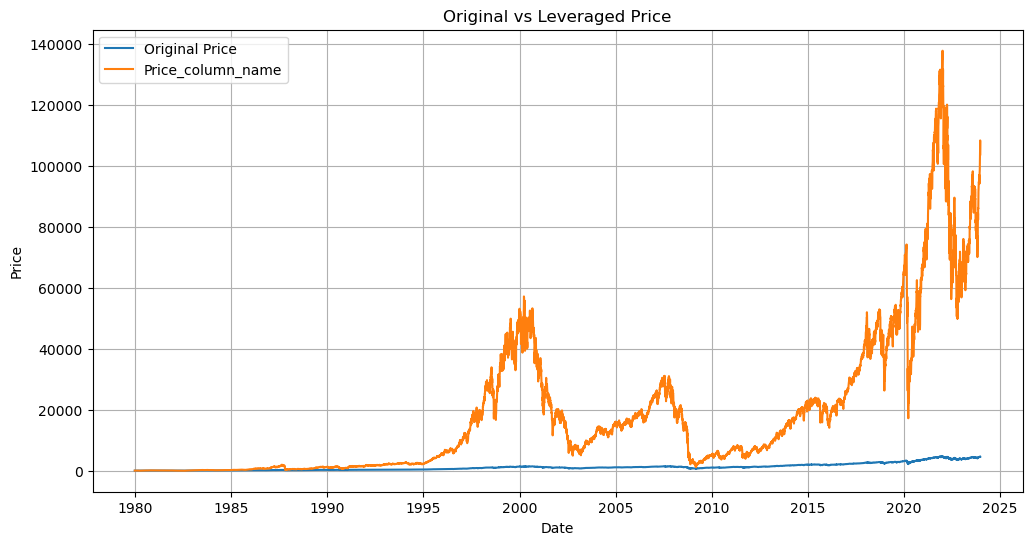

In [124]:
#intial plot let's see
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Original Price')
plt.plot(df['Date'], df[Price_column_name], label='Price_column_name')
plt.title('Original vs Leveraged Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


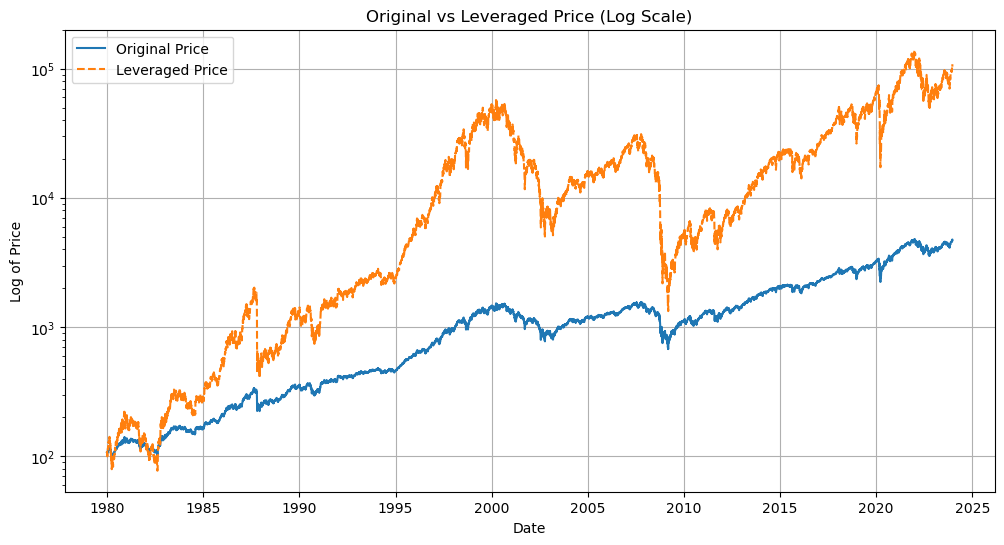

In [125]:
#ok, log transformation
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Original Price')
plt.plot(df['Date'], df[Price_column_name], label='Leveraged Price', linestyle='--')
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.title('Original vs Leveraged Price (Log Scale)')
plt.xlabel('Date')
plt.ylabel('Log of Price')
plt.legend()
plt.grid(True)
plt.show()

In [126]:
num_years = 5
rolling_returns = generalized_rolling_returns(df, "Price", num_years)
rolling_returns = generalized_rolling_returns(rolling_returns, Price_column_name, num_years)
rolling_col_name = str(num_years) +  ' yr Rolling Return ' + Price_column_name

In [127]:
rolling_returns

,Date,Price,Open,High,Low,Vol.,Change %,2x Leveraged Change,2x Leveraged Price,3x Leveraged Change,3x Leveraged Price,5 yr Rolling Return Price,5 yr Rolling Return 3x Leveraged Price
0,1979-12-26,107.80,107.80,108.40,107.10,NaN,0.0009,0.0018,107.800000,0.0027,107.800000,NaN,NaN
1,1979-12-27,108.00,108.00,108.50,107.10,NaN,0.0019,0.0038,108.209640,0.0057,108.414460,NaN,NaN
2,1979-12-28,107.80,107.80,108.60,107.20,NaN,-0.0019,-0.0038,107.798443,-0.0057,107.796498,NaN,NaN
3,1979-12-31,107.90,107.90,108.50,107.30,NaN,0.0009,0.0018,107.992481,0.0027,108.087548,NaN,NaN
4,1980-01-01,107.90,107.90,107.90,107.90,NaN,0.0000,0.0000,107.992481,0.0000,108.087548,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11089,2023-12-14,4719.55,"4,721.04","4,738.57","4,694.34",NaN,0.0026,0.0052,47960.258788,0.0078,105129.332031,78.024345,175.908698
11090,2023-12-15,4719.19,"4,714.23","4,725.53","4,704.69",NaN,-0.0001,-0.0002,47950.666736,-0.0003,105097.793231,78.046360,175.991520
11091,2023-12-18,4740.56,"4,725.58","4,749.52","4,725.58",NaN,0.0045,0.0090,48382.222737,0.0135,106516.613440,82.332737,196.719429
11092,2023-12-19,4768.37,"4,743.72","4,768.69","4,743.72",NaN,0.0059,0.0118,48953.132965,0.0177,108401.957498,87.293102,222.068433


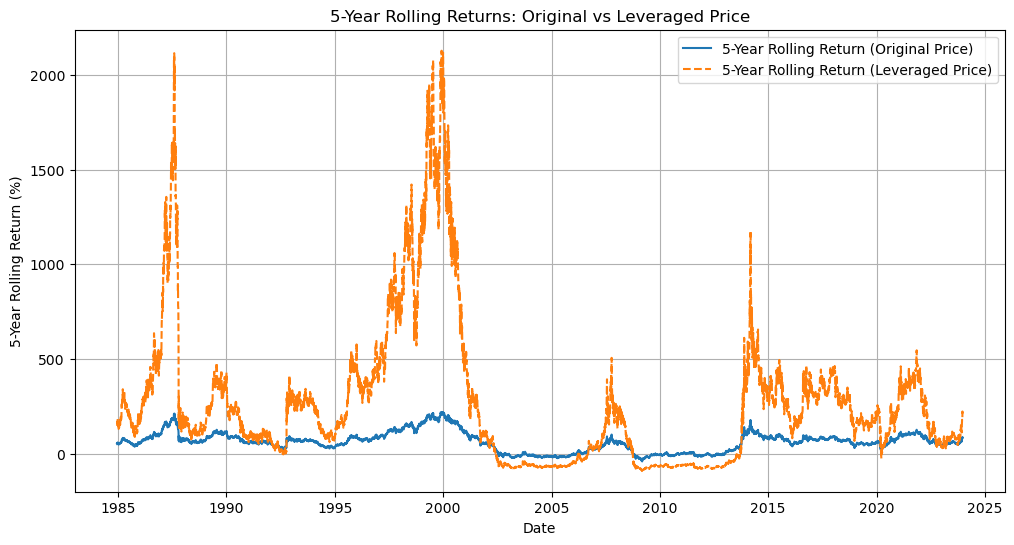

In [128]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

plt.plot(rolling_returns['Date'], rolling_returns['5 yr Rolling Return Price'], label='5-Year Rolling Return (Original Price)')

# Plotting the 5-year rolling returns for the leveraged price
plt.plot(rolling_returns['Date'], rolling_returns[rolling_col_name], label='5-Year Rolling Return (Leveraged Price)', linestyle='--')

plt.title('5-Year Rolling Returns: Original vs Leveraged Price')
plt.xlabel('Date')
plt.ylabel('5-Year Rolling Return (%)')
plt.legend()
plt.grid(True)
plt.show()


In [129]:
num_years_2 = 2.5

rolling_returns = generalized_rolling_returns(df, "Price", num_years_2)
rolling_returns = generalized_rolling_returns(rolling_returns, Price_column_name,num_years_2)
rolling_col_name2 = str(num_years_2) +  ' yr Rolling Return ' + Price_column_name


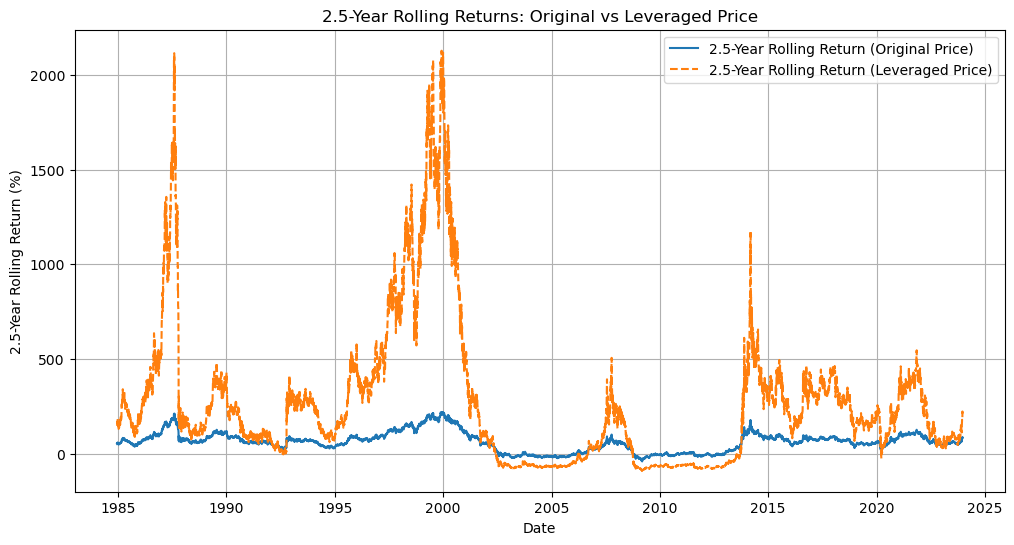

In [130]:
plt.figure(figsize=(12, 6))

plt.plot(rolling_returns['Date'], rolling_returns['2.5 yr Rolling Return Price'], label='2.5-Year Rolling Return (Original Price)')

# Plotting the 5-year rolling returns for the leveraged price
plt.plot(rolling_returns['Date'], rolling_returns[rolling_col_name2], label='2.5-Year Rolling Return (Leveraged Price)', linestyle='--')

plt.title('2.5-Year Rolling Returns: Original vs Leveraged Price')
plt.xlabel('Date')
plt.ylabel('2.5-Year Rolling Return (%)')
plt.legend()
plt.grid(True)
plt.show()


In [131]:
seasonal_ex = simulate_investment(rolling_returns,107.8, 11, 12, 2)
seasonal_ex

,Date,investment_value
0,1979-12-26,107.800000
1,1979-12-27,108.209640
2,1979-12-28,107.798443
3,1979-12-31,107.992481
4,1980-01-01,107.992481
...,...,...
11089,2023-12-14,14917.639144
11090,2023-12-15,14914.655616
11091,2023-12-18,15048.887516
11092,2023-12-19,15226.464389


In [132]:
rolling_returns['seasonal'] = seasonal_ex['investment_value']

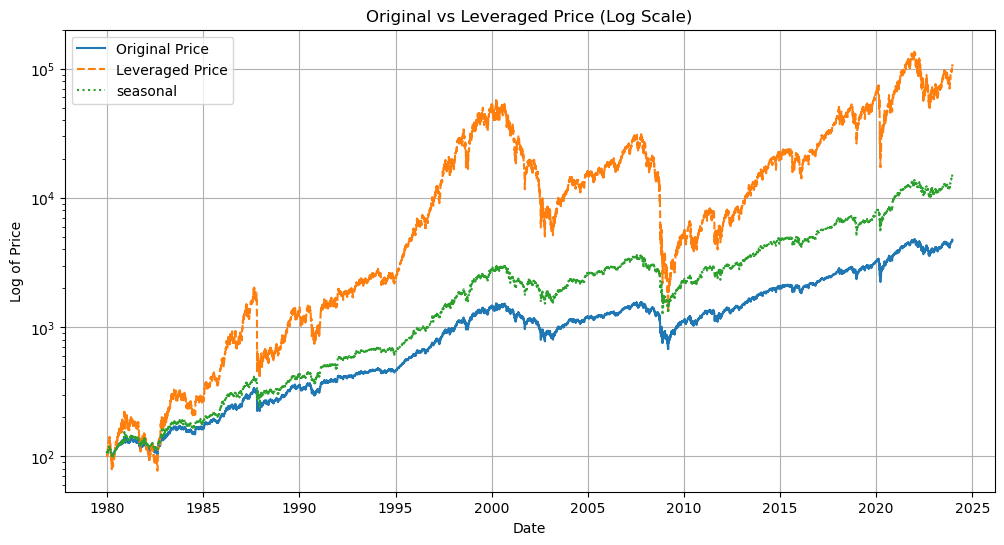

In [133]:
#ok, log transformation


plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Original Price')
plt.plot(df['Date'], df[Price_column_name], label='Leveraged Price', linestyle='--')
plt.plot(df['Date'], seasonal_ex['investment_value'], label='seasonal', linestyle=':')
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.title('Original vs Leveraged Price (Log Scale)')
plt.xlabel('Date')
plt.ylabel('Log of Price')
plt.legend()
plt.grid(True)
plt.show()

In [134]:
generalized_rolling_returns(rolling_returns, 'seasonal', 5)

,Date,Price,Open,High,Low,Vol.,Change %,2x Leveraged Change,2x Leveraged Price,3x Leveraged Change,3x Leveraged Price,5 yr Rolling Return Price,5 yr Rolling Return 3x Leveraged Price,2.5 yr Rolling Return Price,2.5 yr Rolling Return 3x Leveraged Price,seasonal,5 yr Rolling Return seasonal
0,1979-12-26,107.80,107.80,108.40,107.10,NaN,0.0009,0.0018,107.800000,0.0027,107.800000,NaN,NaN,NaN,NaN,107.800000,NaN
1,1979-12-27,108.00,108.00,108.50,107.10,NaN,0.0019,0.0038,108.209640,0.0057,108.414460,NaN,NaN,NaN,NaN,108.209640,NaN
2,1979-12-28,107.80,107.80,108.60,107.20,NaN,-0.0019,-0.0038,107.798443,-0.0057,107.796498,NaN,NaN,NaN,NaN,107.798443,NaN
3,1979-12-31,107.90,107.90,108.50,107.30,NaN,0.0009,0.0018,107.992481,0.0027,108.087548,NaN,NaN,NaN,NaN,107.992481,NaN
4,1980-01-01,107.90,107.90,107.90,107.90,NaN,0.0000,0.0000,107.992481,0.0000,108.087548,NaN,NaN,NaN,NaN,107.992481,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11089,2023-12-14,4719.55,"4,721.04","4,738.57","4,694.34",NaN,0.0026,0.0052,47960.258788,0.0078,105129.332031,78.024345,175.908698,78.024345,175.908698,14917.639144,132.063282
11090,2023-12-15,4719.19,"4,714.23","4,725.53","4,704.69",NaN,-0.0001,-0.0002,47950.666736,-0.0003,105097.793231,78.046360,175.991520,78.046360,175.991520,14914.655616,132.109713
11091,2023-12-18,4740.56,"4,725.58","4,749.52","4,725.58",NaN,0.0045,0.0090,48382.222737,0.0135,106516.613440,82.332737,196.719429,82.332737,196.719429,15048.887516,143.500416
11092,2023-12-19,4768.37,"4,743.72","4,768.69","4,743.72",NaN,0.0059,0.0118,48953.132965,0.0177,108401.957498,87.293102,222.068433,87.293102,222.068433,15226.464389,157.067739


In [135]:
rolling_returns

,Date,Price,Open,High,Low,Vol.,Change %,2x Leveraged Change,2x Leveraged Price,3x Leveraged Change,3x Leveraged Price,5 yr Rolling Return Price,5 yr Rolling Return 3x Leveraged Price,2.5 yr Rolling Return Price,2.5 yr Rolling Return 3x Leveraged Price,seasonal,5 yr Rolling Return seasonal
0,1979-12-26,107.80,107.80,108.40,107.10,NaN,0.0009,0.0018,107.800000,0.0027,107.800000,NaN,NaN,NaN,NaN,107.800000,NaN
1,1979-12-27,108.00,108.00,108.50,107.10,NaN,0.0019,0.0038,108.209640,0.0057,108.414460,NaN,NaN,NaN,NaN,108.209640,NaN
2,1979-12-28,107.80,107.80,108.60,107.20,NaN,-0.0019,-0.0038,107.798443,-0.0057,107.796498,NaN,NaN,NaN,NaN,107.798443,NaN
3,1979-12-31,107.90,107.90,108.50,107.30,NaN,0.0009,0.0018,107.992481,0.0027,108.087548,NaN,NaN,NaN,NaN,107.992481,NaN
4,1980-01-01,107.90,107.90,107.90,107.90,NaN,0.0000,0.0000,107.992481,0.0000,108.087548,NaN,NaN,NaN,NaN,107.992481,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11089,2023-12-14,4719.55,"4,721.04","4,738.57","4,694.34",NaN,0.0026,0.0052,47960.258788,0.0078,105129.332031,78.024345,175.908698,78.024345,175.908698,14917.639144,132.063282
11090,2023-12-15,4719.19,"4,714.23","4,725.53","4,704.69",NaN,-0.0001,-0.0002,47950.666736,-0.0003,105097.793231,78.046360,175.991520,78.046360,175.991520,14914.655616,132.109713
11091,2023-12-18,4740.56,"4,725.58","4,749.52","4,725.58",NaN,0.0045,0.0090,48382.222737,0.0135,106516.613440,82.332737,196.719429,82.332737,196.719429,15048.887516,143.500416
11092,2023-12-19,4768.37,"4,743.72","4,768.69","4,743.72",NaN,0.0059,0.0118,48953.132965,0.0177,108401.957498,87.293102,222.068433,87.293102,222.068433,15226.464389,157.067739


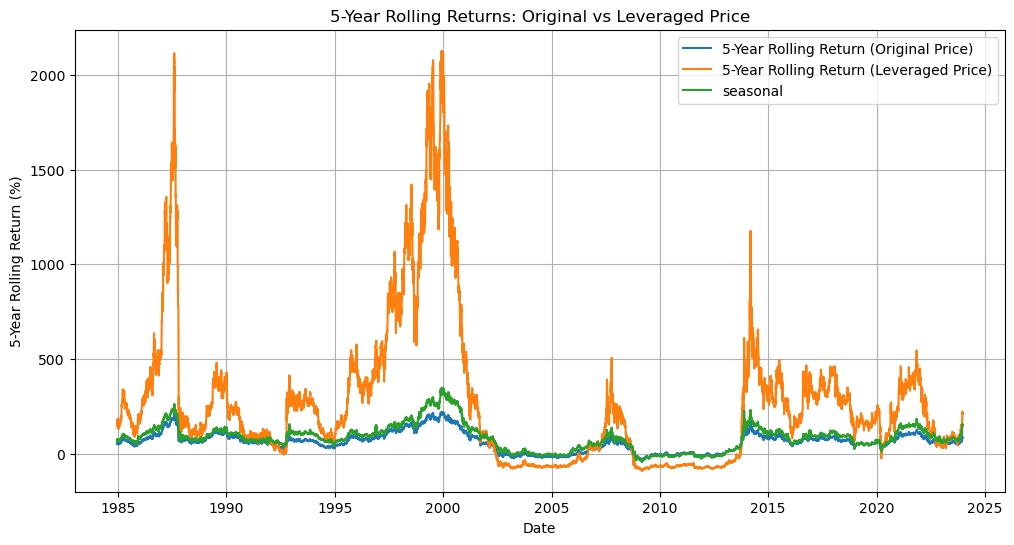

In [136]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

plt.plot(rolling_returns['Date'], rolling_returns['5 yr Rolling Return Price'], label='5-Year Rolling Return (Original Price)')

# Plotting the 5-year rolling returns for the leveraged price
plt.plot(rolling_returns['Date'], rolling_returns[rolling_col_name], label='5-Year Rolling Return (Leveraged Price)')

plt.plot(rolling_returns['Date'], rolling_returns['5 yr Rolling Return seasonal'], label='seasonal')

plt.title('5-Year Rolling Returns: Original vs Leveraged Price')
plt.xlabel('Date')
plt.ylabel('5-Year Rolling Return (%)')
plt.legend()
plt.grid(True)
plt.show()


In [137]:
rolling_returns

,Date,Price,Open,High,Low,Vol.,Change %,2x Leveraged Change,2x Leveraged Price,3x Leveraged Change,3x Leveraged Price,5 yr Rolling Return Price,5 yr Rolling Return 3x Leveraged Price,2.5 yr Rolling Return Price,2.5 yr Rolling Return 3x Leveraged Price,seasonal,5 yr Rolling Return seasonal
0,1979-12-26,107.80,107.80,108.40,107.10,NaN,0.0009,0.0018,107.800000,0.0027,107.800000,NaN,NaN,NaN,NaN,107.800000,NaN
1,1979-12-27,108.00,108.00,108.50,107.10,NaN,0.0019,0.0038,108.209640,0.0057,108.414460,NaN,NaN,NaN,NaN,108.209640,NaN
2,1979-12-28,107.80,107.80,108.60,107.20,NaN,-0.0019,-0.0038,107.798443,-0.0057,107.796498,NaN,NaN,NaN,NaN,107.798443,NaN
3,1979-12-31,107.90,107.90,108.50,107.30,NaN,0.0009,0.0018,107.992481,0.0027,108.087548,NaN,NaN,NaN,NaN,107.992481,NaN
4,1980-01-01,107.90,107.90,107.90,107.90,NaN,0.0000,0.0000,107.992481,0.0000,108.087548,NaN,NaN,NaN,NaN,107.992481,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11089,2023-12-14,4719.55,"4,721.04","4,738.57","4,694.34",NaN,0.0026,0.0052,47960.258788,0.0078,105129.332031,78.024345,175.908698,78.024345,175.908698,14917.639144,132.063282
11090,2023-12-15,4719.19,"4,714.23","4,725.53","4,704.69",NaN,-0.0001,-0.0002,47950.666736,-0.0003,105097.793231,78.046360,175.991520,78.046360,175.991520,14914.655616,132.109713
11091,2023-12-18,4740.56,"4,725.58","4,749.52","4,725.58",NaN,0.0045,0.0090,48382.222737,0.0135,106516.613440,82.332737,196.719429,82.332737,196.719429,15048.887516,143.500416
11092,2023-12-19,4768.37,"4,743.72","4,768.69","4,743.72",NaN,0.0059,0.0118,48953.132965,0.0177,108401.957498,87.293102,222.068433,87.293102,222.068433,15226.464389,157.067739


In [138]:
#interval_rebalence_calibrator(rolling_returns, 'Price', 'First_Month_Price', 2)

In [139]:
generalized_non_daily_rebalance(rolling_returns, 'Price', 'year', 3, 107.8)

,Date,Price,Open,High,Low,Vol.,Change %,2x Leveraged Change,2x Leveraged Price,3x Leveraged Change,3x Leveraged Price,5 yr Rolling Return Price,5 yr Rolling Return 3x Leveraged Price,2.5 yr Rolling Return Price,2.5 yr Rolling Return 3x Leveraged Price,seasonal,5 yr Rolling Return seasonal,Year,{3}x {'year'}indicated rebalance
0,1979-12-26,107.80,107.80,108.40,107.10,NaN,0.0009,0.0018,107.800000,0.0027,107.800000,NaN,NaN,NaN,NaN,107.800000,NaN,1979,107.800000
1,1979-12-27,108.00,108.00,108.50,107.10,NaN,0.0019,0.0038,108.209640,0.0057,108.414460,NaN,NaN,NaN,NaN,108.209640,NaN,1979,108.414460
2,1979-12-28,107.80,107.80,108.60,107.20,NaN,-0.0019,-0.0038,107.798443,-0.0057,107.796498,NaN,NaN,NaN,NaN,107.798443,NaN,1979,107.798833
3,1979-12-31,107.90,107.90,108.50,107.30,NaN,0.0009,0.0018,107.992481,0.0027,108.087548,NaN,NaN,NaN,NaN,107.992481,NaN,1979,108.089891
4,1980-01-01,107.90,107.90,107.90,107.90,NaN,0.0000,0.0000,107.992481,0.0000,108.087548,NaN,NaN,NaN,NaN,107.992481,NaN,1980,108.089891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11089,2023-12-14,4719.55,"4,721.04","4,738.57","4,694.34",NaN,0.0026,0.0052,47960.258788,0.0078,105129.332031,78.024345,175.908698,78.024345,175.908698,14917.639144,132.063282,2023,33793.467523
11090,2023-12-15,4719.19,"4,714.23","4,725.53","4,704.69",NaN,-0.0001,-0.0002,47950.666736,-0.0003,105097.793231,78.046360,175.991520,78.046360,175.991520,14914.655616,132.109713,2023,33789.323348
11091,2023-12-18,4740.56,"4,725.58","4,749.52","4,725.58",NaN,0.0045,0.0090,48382.222737,0.0135,106516.613440,82.332737,196.719429,82.332737,196.719429,15048.887516,143.500416,2023,33975.792563
11092,2023-12-19,4768.37,"4,743.72","4,768.69","4,743.72",NaN,0.0059,0.0118,48953.132965,0.0177,108401.957498,87.293102,222.068433,87.293102,222.068433,15226.464389,157.067739,2023,34221.374592


In [140]:
generalized_non_daily_rebalance(rolling_returns, 'Price', 'month', 4, 107.8)

,Date,Price,Open,High,Low,Vol.,Change %,2x Leveraged Change,2x Leveraged Price,3x Leveraged Change,...,5 yr Rolling Return Price,5 yr Rolling Return 3x Leveraged Price,2.5 yr Rolling Return Price,2.5 yr Rolling Return 3x Leveraged Price,seasonal,5 yr Rolling Return seasonal,Year,{3}x {'year'}indicated rebalance,Month,{4}x {'month'}indicated rebalance
0,1979-12-26,107.80,107.80,108.40,107.10,NaN,0.0009,0.0018,107.800000,0.0027,...,NaN,NaN,NaN,NaN,107.800000,NaN,1979,107.800000,1979-12,107.800000
1,1979-12-27,108.00,108.00,108.50,107.10,NaN,0.0019,0.0038,108.209640,0.0057,...,NaN,NaN,NaN,NaN,108.209640,NaN,1979,108.414460,1979-12,108.619280
2,1979-12-28,107.80,107.80,108.60,107.20,NaN,-0.0019,-0.0038,107.798443,-0.0057,...,NaN,NaN,NaN,NaN,107.798443,NaN,1979,107.798833,1979-12,107.798443
3,1979-12-31,107.90,107.90,108.50,107.30,NaN,0.0009,0.0018,107.992481,0.0027,...,NaN,NaN,NaN,NaN,107.992481,NaN,1979,108.089891,1979-12,108.186522
4,1980-01-01,107.90,107.90,107.90,107.90,NaN,0.0000,0.0000,107.992481,0.0000,...,NaN,NaN,NaN,NaN,107.992481,NaN,1980,108.089891,1980-01,108.186522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11089,2023-12-14,4719.55,"4,721.04","4,738.57","4,694.34",NaN,0.0026,0.0052,47960.258788,0.0078,...,78.024345,175.908698,78.024345,175.908698,14917.639144,132.063282,2023,33793.467523,2023-12,51146.240765
11090,2023-12-15,4719.19,"4,714.23","4,725.53","4,704.69",NaN,-0.0001,-0.0002,47950.666736,-0.0003,...,78.046360,175.991520,78.046360,175.991520,14914.655616,132.109713,2023,33789.323348,2023-12,51139.747751
11091,2023-12-18,4740.56,"4,725.58","4,749.52","4,725.58",NaN,0.0045,0.0090,48382.222737,0.0135,...,82.332737,196.719429,82.332737,196.719429,15048.887516,143.500416,2023,33975.792563,2023-12,51431.904121
11092,2023-12-19,4768.37,"4,743.72","4,768.69","4,743.72",NaN,0.0059,0.0118,48953.132965,0.0177,...,87.293102,222.068433,87.293102,222.068433,15226.464389,157.067739,2023,34221.374592,2023-12,51816.677307


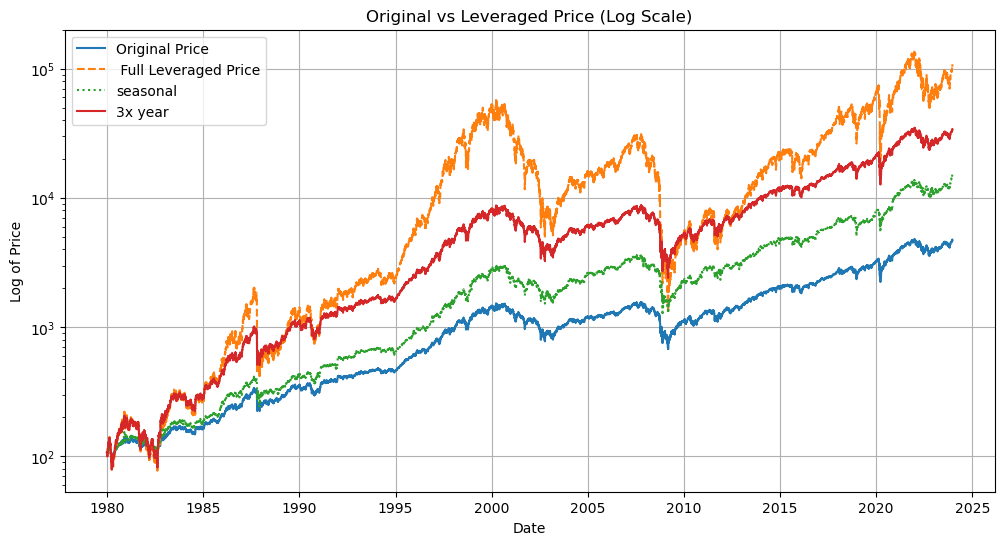

In [141]:
#ok, log transformation
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Original Price')
plt.plot(df['Date'], df[Price_column_name], label=' Full Leveraged Price', linestyle='--')
plt.plot(df['Date'], seasonal_ex['investment_value'], label='seasonal', linestyle=':')
plt.plot(df['Date'], rolling_returns["{3}x {'year'}indicated rebalance"], label='3x year', )
#plt.plot(df['Date'], rolling_returns["{3}x {'month'}indicated rebalance"], label='3x monthly', )
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.title('Original vs Leveraged Price (Log Scale)')
plt.xlabel('Date')
plt.ylabel('Log of Price')
plt.legend()
plt.grid(True)
plt.show()

 # Classification + Risk analysis

In [142]:
annual_std_dev_percentage(rolling_returns, 'Date', 'Price').values

array([0.1929119 , 1.0318596 , 0.85557122, 1.15122153, 0.83808726,
       0.80247403, 0.6363641 , 0.92394682, 2.02583756, 1.07677399,
       0.82238068, 1.00431595, 0.90121912, 0.61047954, 0.54214549,
       0.62016747, 0.49167803, 0.74270713, 1.14198894, 1.27823473,
       1.13846276, 1.39958555, 1.3577206 , 1.63990278, 1.07505078,
       0.69893327, 0.64820826, 0.6315239 , 1.00697977, 2.58107233,
       1.71879442, 1.13715303, 1.46610844, 0.80422491, 0.69726985,
       0.71627738, 0.97601357, 0.82490467, 0.42115684, 1.07415277,
       0.78516496, 2.16897146, 0.82521171, 1.52181638, 0.83199233])

<AxesSubplot:ylabel='Density'>

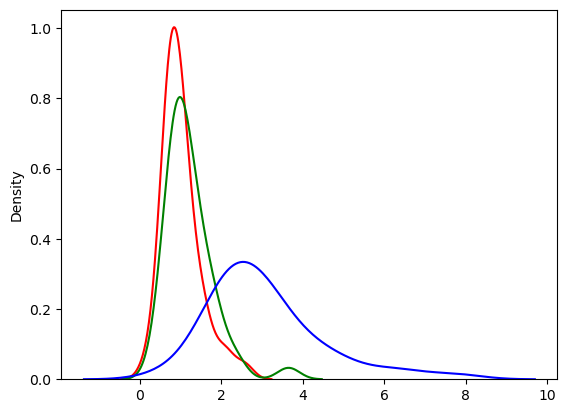

In [143]:
sns.kdeplot(annual_std_dev_percentage(rolling_returns, 'Date', 'Price').values, color = "red")
sns.kdeplot(annual_std_dev_percentage(rolling_returns, 'Date', 'seasonal').values, color = 'green')
sns.kdeplot(annual_std_dev_percentage(rolling_returns, 'Date', Price_column_name).values, color = 'blue')

In [144]:
beta_1 = calculate_beta(rolling_returns, "Price", 'Price')
beta_seasonal = calculate_beta(rolling_returns, "seasonal", 'Price')
beta_2x = calculate_beta(rolling_returns, '2x Leveraged Price', 'Price')
beta_3x = calculate_beta(rolling_returns, '3x Leveraged Price', 'Price')
print([beta_1, beta_seasonal, beta_2x, beta_3x])

[1.0000000000000027, 2.794508880872621, 9.325818184696518, 19.95307768803423]


In [145]:
rolling_returns

,Date,Price,Open,High,Low,Vol.,Change %,2x Leveraged Change,2x Leveraged Price,3x Leveraged Change,...,5 yr Rolling Return Price,5 yr Rolling Return 3x Leveraged Price,2.5 yr Rolling Return Price,2.5 yr Rolling Return 3x Leveraged Price,seasonal,5 yr Rolling Return seasonal,Year,{3}x {'year'}indicated rebalance,Month,{4}x {'month'}indicated rebalance
0,1979-12-26,107.80,107.80,108.40,107.10,NaN,0.0009,0.0018,107.800000,0.0027,...,NaN,NaN,NaN,NaN,107.800000,NaN,1979,107.800000,1979-12,107.800000
1,1979-12-27,108.00,108.00,108.50,107.10,NaN,0.0019,0.0038,108.209640,0.0057,...,NaN,NaN,NaN,NaN,108.209640,NaN,1979,108.414460,1979-12,108.619280
2,1979-12-28,107.80,107.80,108.60,107.20,NaN,-0.0019,-0.0038,107.798443,-0.0057,...,NaN,NaN,NaN,NaN,107.798443,NaN,1979,107.798833,1979-12,107.798443
3,1979-12-31,107.90,107.90,108.50,107.30,NaN,0.0009,0.0018,107.992481,0.0027,...,NaN,NaN,NaN,NaN,107.992481,NaN,1979,108.089891,1979-12,108.186522
4,1980-01-01,107.90,107.90,107.90,107.90,NaN,0.0000,0.0000,107.992481,0.0000,...,NaN,NaN,NaN,NaN,107.992481,NaN,1980,108.089891,1980-01,108.186522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11089,2023-12-14,4719.55,"4,721.04","4,738.57","4,694.34",NaN,0.0026,0.0052,47960.258788,0.0078,...,78.024345,175.908698,78.024345,175.908698,14917.639144,132.063282,2023,33793.467523,2023-12,51146.240765
11090,2023-12-15,4719.19,"4,714.23","4,725.53","4,704.69",NaN,-0.0001,-0.0002,47950.666736,-0.0003,...,78.046360,175.991520,78.046360,175.991520,14914.655616,132.109713,2023,33789.323348,2023-12,51139.747751
11091,2023-12-18,4740.56,"4,725.58","4,749.52","4,725.58",NaN,0.0045,0.0090,48382.222737,0.0135,...,82.332737,196.719429,82.332737,196.719429,15048.887516,143.500416,2023,33975.792563,2023-12,51431.904121
11092,2023-12-19,4768.37,"4,743.72","4,768.69","4,743.72",NaN,0.0059,0.0118,48953.132965,0.0177,...,87.293102,222.068433,87.293102,222.068433,15226.464389,157.067739,2023,34221.374592,2023-12,51816.677307


In [146]:
dataframe= pd.DataFrame({'volatility': annualized_volatility(rolling_returns, 'Price'), 'return': calculate_yearly_return(rolling_returns, 'Price')})
dataframe['leverage win?_2'] = (dataframe['return'] < calculate_yearly_return(rolling_returns, '2x Leveraged Price'))
dataframe['leverage return_2'] = calculate_yearly_return(rolling_returns, '2x Leveraged Price')
dataframe['leverage win?_3'] = (dataframe['return'] < calculate_yearly_return(rolling_returns, '3x Leveraged Price'))
dataframe['leverage return_3'] = calculate_yearly_return(rolling_returns, '3x Leveraged Price')
dataframe['seasonal_win'] = (dataframe['return'] < calculate_yearly_return(rolling_returns, 'seasonal'))
dataframe['seasonal_return'] = calculate_yearly_return(rolling_returns, 'seasonal')
dataframe

,volatility,return,leverage win?_2,leverage return_2,leverage win?_3,leverage return_3,seasonal_win,seasonal_return
Year,,,,,,,,
1979,2.512529,0.092764,True,0.178553,True,0.266742,True,0.178553
1980,16.380263,25.857275,True,54.071588,True,83.570962,True,33.215679
1981,13.581772,-10.051357,False,-20.708109,False,-31.337932,True,-9.757685
1982,18.275075,14.588427,True,27.015068,True,36.298899,True,19.518216
1983,13.304223,19.233550,True,39.710983,True,60.873480,True,20.043862
1984,12.738880,1.951220,True,2.231999,False,0.934558,True,2.363683
1985,10.101967,27.750907,True,61.560678,True,102.255381,True,41.925708
1986,14.667201,15.553435,True,30.748972,True,44.625783,False,14.386360
1987,32.159174,0.284091,False,-11.786715,False,-35.826619,False,-2.963958


In [147]:
#quick detour to return summary:

In [148]:
[np.median(dataframe['seasonal_return']), np.median(dataframe['leverage return_2']), np.median(dataframe['leverage return_3'])]


[14.937845237746469, 21.667018797032004, 30.81435200726087]

In [149]:
seasonal_cagr = calculate_cagr(rolling_returns, 'seasonal', 'seasonal')
x2_lev_cagr = calculate_cagr(rolling_returns, '2x Leveraged Price', '2x Leveraged Price')
x3_lev_cagr = calculate_cagr(rolling_returns, '3x Leveraged Price', '3x Leveraged Price')
print([seasonal, x2_lev, x3_lev])

[(0.11840471592523238,), 0.1484977407575867, 0.16905650923859428]


In [150]:
#Compared to 3x, seasonal has only 14% of the beta, but 70% of the CAGR. 
seasonal_vs3x_beta = beta_seasonal / beta_3x
seasonal_vs3x_CAGR = seasonal_cagr / x3_lev_cagr
[pct_change_beta, seasonal_vs3x_CAGR]

[0.14005402698093414, 0.7003854300464967]

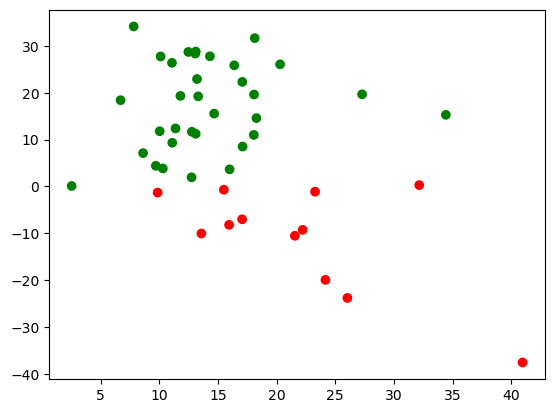

In [151]:
plt.scatter(dataframe['volatility'], dataframe['return'], c=dataframe['leverage win?_2'].map({True: 'green', False: 'red'}))


In [152]:
df = dataframe[1:]
df

,volatility,return,leverage win?_2,leverage return_2,leverage win?_3,leverage return_3,seasonal_win,seasonal_return
Year,,,,,,,,
1980,16.380263,25.857275,True,54.071588,True,83.570962,True,33.215679
1981,13.581772,-10.051357,False,-20.708109,False,-31.337932,True,-9.757685
1982,18.275075,14.588427,True,27.015068,True,36.298899,True,19.518216
1983,13.304223,19.233550,True,39.710983,True,60.873480,True,20.043862
1984,12.738880,1.951220,True,2.231999,False,0.934558,True,2.363683
1985,10.101967,27.750907,True,61.560678,True,102.255381,True,41.925708
1986,14.667201,15.553435,True,30.748972,True,44.625783,False,14.386360
1987,32.159174,0.284091,False,-11.786715,False,-35.826619,False,-2.963958
1988,17.093257,8.518953,True,14.368229,True,17.046622,False,7.792084


In [153]:
#what proportion of the time is leveraged outpreforming the original?
np.mean(df['leverage win?_3'])

0.6590909090909091

In [154]:
np.mean(df['leverage win?_2'])

0.7272727272727273

/Users/adamstaley/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


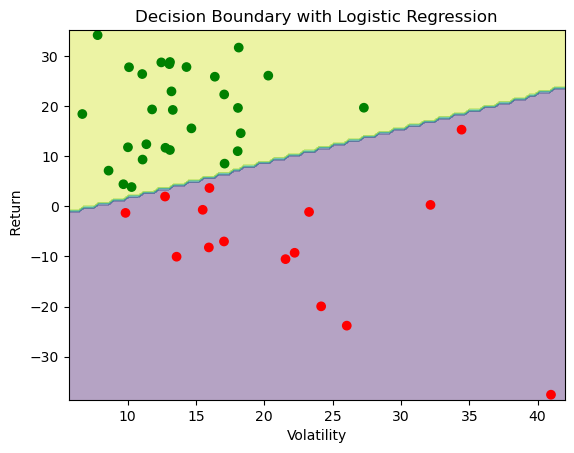

In [155]:
X = df[['volatility', 'return']]
y = df['leverage win?_3']

# Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Create meshgrid for plotting decision boundary
x_min, x_max = X['volatility'].min() - 1, X['volatility'].max() + 1
y_min, y_max = X['return'].min() - 1, X['return'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X['volatility'], X['return'], c=y.map({True: 'green', False: 'red'}))
plt.xlabel('Volatility')
plt.ylabel(' Return')
plt.title('Decision Boundary with Logistic Regression')

plt.show()

In [156]:
# Assuming 'model' is your trained LogisticRegression model
intercept = model.intercept_[0]
coefficients = model.coef_[0]

slope = -coefficients[0] / coefficients[1]
intercept = -intercept / coefficients[1]

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


Slope: 0.688520007508067
Intercept: -5.142466159923157


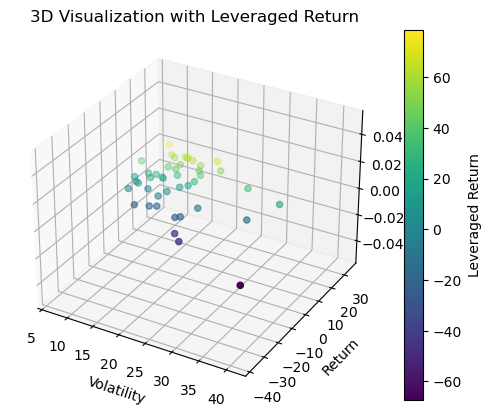

In [157]:
X = df[['volatility', 'return']]
y = df['leverage win?_2']
leveraged_return = df['leverage return_2']
# Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot where color intensity represents 'leveraged return'
scatter = ax.scatter(df['volatility'], df['return'], c=leveraged_return, cmap='viridis')

ax.set_xlabel('Volatility')
ax.set_ylabel('Return')
ax.set_zlabel('Leveraged Return')

# Color bar to show the leveraged return values
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Leveraged Return')

plt.title('3D Visualization with Leveraged Return')
plt.show()


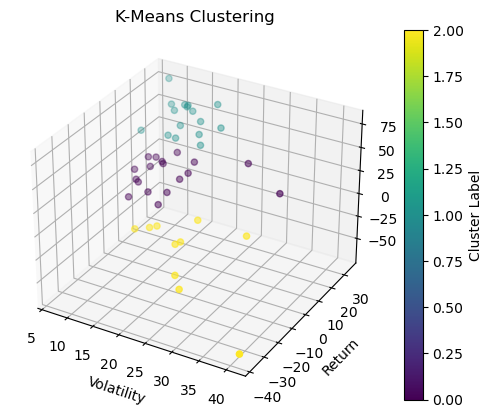

In [158]:
X = df[['volatility', 'return', 'leverage return_2']]  # Replace with your actual column names

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)  # You can change the number of clusters
kmeans.fit(X)
labels = kmeans.labels_


# Create a 3D scatter plot with clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors for clusters
scatter = ax.scatter(X['volatility'], X['return'], X['leverage return_2'], c=labels, cmap='viridis')

# Adding labels and title
ax.set_xlabel('Volatility')
ax.set_ylabel('Return')
ax.set_zlabel('Leveraged Return')
plt.title('K-Means Clustering')

# Color bar to show the cluster colors
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Cluster Label')

plt.show()


In [163]:
#X = df[['volatility', 'return', 'leverage return_2']] 

# Perform K-means clustering
#kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
#kmeans.fit(X)
#df['Cluster'] = kmeans.labels_

# Filter the DataFrame to get the years in cluster 0
#cluster_0_years = df[df['Cluster'] == 0].iloc[:, 0]

#print("Years in Cluster 0:")
#print(cluster_0_years)


In [160]:
break_evenat_20 = -5.142466159923157 + 0.688520007508067 *20
break_evenat_20

8.627933990238184

<AxesSubplot:xlabel='Daily_Return', ylabel='Density'>

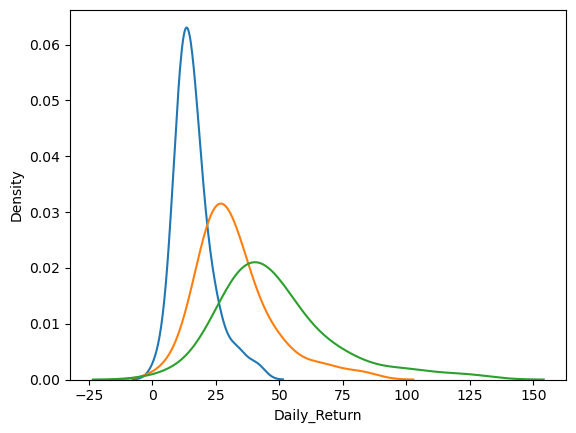

In [161]:
sns.kdeplot(annualized_volatility(rolling_returns, 'Price')*1)
sns.kdeplot(annualized_volatility(rolling_returns, 'Price')*2)
sns.kdeplot(annualized_volatility(rolling_returns, '3x Leveraged Price') )
